In [173]:
iFyt = 0.03
iC = 0.05
m=6
pv = pow(1/(1+iFyt),m/12)
tv = 1/(1+iFyt)
deposit = 1

def p(n):
    return deposit*pow(pv,n)

def P(i):
    return iC*deposit*sum([p(i) for i in list(range(0,i+1))])



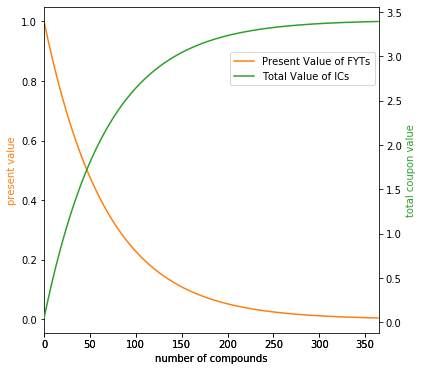

In [175]:
import matplotlib.pyplot as plt
import numpy  as np
n=list(range(0,365))
x=np.array(n)
y=np.array([p(i) for i in n])
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x,y,'C1',label='Present Value of FYTs')
ax1.set_xlim([n[0],n[len(n)-1]+1])
ax1.set_xlabel('number of compounds')
ax1.set_ylabel('present value')
ax1.yaxis.label.set_color('C1')

y=np.array([P(i) for i in n])
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(x,y,'C2',label='Total Value of ICs')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim([n[0],n[len(n)-1]+1])
ax2.set_xlabel('number of compounds')
ax2.set_ylabel('total coupon value')
ax2.yaxis.label.set_color('C2')
fig.legend( loc='center',bbox_to_anchor=(0.7,0.7))


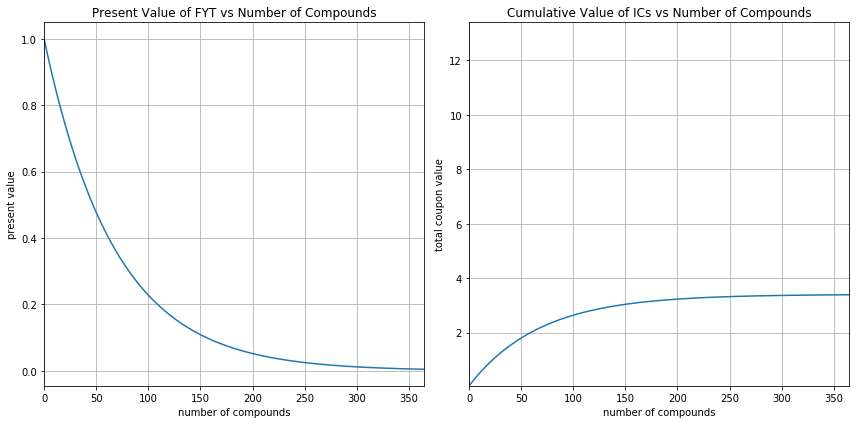

In [176]:
import matplotlib.pyplot as plt
import numpy  as np
n=list(range(0,365))
x=np.array(n)
y=np.array([p(i) for i in n])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(x,y)
ax[0].set_xlim([n[0],n[len(n)-1]+1])
ax[0].grid()
ax[0].set_title('Present Value of FYT vs Number of Compounds')
ax[0].set_xlabel('number of compounds')
ax[0].set_ylabel('present value')

y=np.array([P(i) for i in n])
ax[1].plot(x,y)
ax[1].set_xlim([n[0],n[len(n)-1]+1])
ax[1].set_ylim([y[0],y[len(y)-1]+10])
ax[1].grid()
ax[1].set_title('Cumulative Value of ICs vs Number of Compounds')
ax[1].set_xlabel('number of compounds')
ax[1].set_ylabel('total coupon value')

fig.tight_layout()


In [310]:
iZcb = 0.03
iC = 0.05
initial_funds = 1
initial_num_days_to_maturity=365
days=list(range(0,365))

class Asset: 
    def __init__(self,day,num): 
        self.day_issued = day
        self.quantity = num 
        
def calc_present_value(day,amount,rate):
    return amount/pow(1+rate,(max(initial_num_days_to_maturity-day,0))/365)

def calc_zcb_present_value(day,amount):
    return calc_present_value(day,amount,iZcb)

def calc_ic_present_value(day,amount):
    return iC*calc_present_value(day,amount,iC)

def calc_ic_maturity(amount):
    return iC*amount

def calc_total_present_value(day,zcbs_list,ics_list):
    total_value = 0
    zcbs_value = 0
    ics_value = 0
    # calc zcb total value
    for i,zcbs in enumerate(zcbs_list):
        days_elapsed = day - zcbs.day_issued
        zcbs_value += calc_zcb_present_value(days_elapsed,zcbs.quantity)
    
    # calc ics total value
    for i,ics in enumerate(ics_list):
        days_elapsed = day - ics.day_issued
        ics_present_value = calc_ic_present_value(days_elapsed,ics.quantity)
        ics_maturity = calc_ic_maturity(ics.quantity)
        ics_value += ics_present_value
        print("ICs Issue Day: {}, ICs at Maturity: {}, ICs at Present Value: {}".format(ics.day_issued, ics_maturity, ics_present_value))
        
    total_value = zcbs_value + ics_value
    
    return total_value, zcbs_value, ics_value
        
def deposit(day,funds):
    zcbs = Asset(day,funds)
    ics = Asset(day,funds) 
    return zcbs,ics

def sell_zcbs(day,zcbs):
    days_elapsed = day - zcbs.day_issued
    return calc_zcb_present_value(days_elapsed,zcbs.quantity)


In [311]:
funds = initial_funds
zcbs_list = []
ics_list = []
total_values = []
zcbs_values = []
ics_values = []
# Day 0 deposit funds to get zcbs and ics
zcbs,ics = deposit(0,funds)
zcbs_list.append(zcbs)
ics_list.append(ics)

print("Day: {}".format(0))
total_value, zcbs_value, ics_value = calc_total_present_value(0,zcbs_list,ics_list)
print("Total Value: {}, ZCB Value: {}, IC Value: {}".format(total_value, zcbs_value, ics_value))
total_values.append(total_value)
zcbs_values.append(zcbs_value)
ics_values.append(ics_value)
for day in days[1:]:
    print("Day: {}".format(day))
    # check to see if a week has passed
    if day%7 == 0:
        # sell existing zcbs at present value
        zcbs = zcbs_list.pop(0)
        new_funds = sell_zcbs(day,zcbs)
        print("Sold {} zcbs from day {} tranch for {}".format(zcbs.quantity, zcbs.day_issued, new_funds))
        # buy newly issued tranch of zcbs,ics
        new_zcbs,new_ics = deposit(day,new_funds)
        zcbs_list.append(new_zcbs)
        ics_list.append(new_ics)
        print("Bought {} zcbs and ics".format(zcbs.quantity, zcbs.day_issued, new_funds))
    
    total_value, zcbs_value, ics_value = calc_total_present_value(day,zcbs_list,ics_list)
    print("Total Value: {}, ZCB Value: {}, IC Value: {}".format(total_value, zcbs_value, ics_value))
    total_values.append(total_value)
    zcbs_values.append(zcbs_value)
    ics_values.append(ics_value)
    
    





Day: 0
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.047619047619047616
Total Value: 1.0184928340268147, ZCB Value: 0.970873786407767, IC Value: 0.047619047619047616
Day: 1
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.04762541336271969
Total Value: 1.0185778272452954, ZCB Value: 0.9709524138825758, IC Value: 0.04762541336271969
Day: 2
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.0476317799573683
Total Value: 1.018662827682501, ZCB Value: 0.9710310477251327, IC Value: 0.0476317799573683
Day: 3
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.047638147403107206
Total Value: 1.0187478353390609, ZCB Value: 0.9711096879359538, IC Value: 0.047638147403107206
Day: 4
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.047644515700050204
Total Value: 1.0188328502156045, ZCB Value: 0.9711883345155544, IC Value: 0.047644515700050204
Day: 5
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.047650

ICs Issue Day: 14, ICs at Maturity: 0.04718325974310354, ICs at Present Value: 0.04567526683747934
ICs Issue Day: 21, ICs at Maturity: 0.04583496565614121, ICs at Present Value: 0.04432856695391862
ICs Issue Day: 28, ICs at Maturity: 0.0445251999997035, ICs at Present Value: 0.04302157347388773
ICs Issue Day: 35, ICs at Maturity: 0.04325286179739882, ICs at Present Value: 0.041753115684817016
ICs Issue Day: 42, ICs at Maturity: 0.042016881533992884, ICs at Present Value: 0.0405220573916906
ICs Issue Day: 49, ICs at Maturity: 0.04081622025638457, ICs at Present Value: 0.039327295899323086
ICs Issue Day: 56, ICs at Maturity: 0.03964986870027193, ICs at Present Value: 0.03816776102464298
ICs Issue Day: 63, ICs at Maturity: 0.03851684644177434, ICs at Present Value: 0.037042414138098174
ICs Issue Day: 70, ICs at Maturity: 0.03741620107329763, ICs at Present Value: 0.03595024723332485
ICs Issue Day: 77, ICs at Maturity: 0.03634700740294944, ICs at Present Value: 0.03489028202424651
ICs Issu

ICs Issue Day: 7, ICs at Maturity: 0.0485712156236096, ICs at Present Value: 0.04744819763671706
ICs Issue Day: 14, ICs at Maturity: 0.04718325974310354, ICs at Present Value: 0.04604922426104099
ICs Issue Day: 21, ICs at Maturity: 0.04583496565614121, ICs at Present Value: 0.04469149853234269
ICs Issue Day: 28, ICs at Maturity: 0.0445251999997035, ICs at Present Value: 0.04337380429568255
ICs Issue Day: 35, ICs at Maturity: 0.04325286179739882, ICs at Present Value: 0.04209496125350788
ICs Issue Day: 42, ICs at Maturity: 0.042016881533992884, ICs at Present Value: 0.040853823908425624
ICs Issue Day: 49, ICs at Maturity: 0.04081622025638457, ICs at Present Value: 0.039649280537146586
ICs Issue Day: 56, ICs at Maturity: 0.03964986870027193, ICs at Present Value: 0.03848025219468208
ICs Issue Day: 63, ICs at Maturity: 0.03851684644177434, ICs at Present Value: 0.03734569174790121
ICs Issue Day: 70, ICs at Maturity: 0.03741620107329763, ICs at Present Value: 0.03624458293758278
ICs Issue 

ICs Issue Day: 21, ICs at Maturity: 0.04583496565614121, ICs at Present Value: 0.04501526097076936
ICs Issue Day: 28, ICs at Maturity: 0.0445251999997035, ICs at Present Value: 0.04368802084925032
ICs Issue Day: 35, ICs at Maturity: 0.04325286179739882, ICs at Present Value: 0.04239991337524193
ICs Issue Day: 42, ICs at Maturity: 0.042016881533992884, ICs at Present Value: 0.0411497847529266
ICs Issue Day: 49, ICs at Maturity: 0.04081622025638457, ICs at Present Value: 0.03993651520526315
ICs Issue Day: 56, ICs at Maturity: 0.03964986870027193, ICs at Present Value: 0.03875901797096965
ICs Issue Day: 63, ICs at Maturity: 0.03851684644177434, ICs at Present Value: 0.037616238331079244
ICs Issue Day: 70, ICs at Maturity: 0.03741620107329763, ICs at Present Value: 0.03650715266419728
ICs Issue Day: 77, ICs at Maturity: 0.03634700740294944, ICs at Present Value: 0.03543076752961354
ICs Issue Day: 84, ICs at Maturity: 0.03530836667683183, ICs at Present Value: 0.034386118777448064
ICs Issue

ICs Issue Day: 196, ICs at Maturity: 0.022203484023350414, ICs at Present Value: 0.021436467532455362
ICs Issue Day: 203, ICs at Maturity: 0.021569004201870474, ICs at Present Value: 0.020804429882130732
ICs Issue Day: 210, ICs at Maturity: 0.020952655077511845, ICs at Present Value: 0.02019102737263903
ICs Issue Day: 217, ICs at Maturity: 0.020353918553138922, ICs at Present Value: 0.019595710561279046
ICs Issue Day: 224, ICs at Maturity: 0.01977229133659797, ICs at Present Value: 0.01901794620524227
ICs Issue Day: 231, ICs at Maturity: 0.01920728451765456, ICs at Present Value: 0.018457216783971577
ICs Issue Day: 238, ICs at Maturity: 0.018658423157020355, ICs at Present Value: 0.017913020035602863
ICs Issue Day: 245, ICs at Maturity: 0.018125245887123723, ICs at Present Value: 0.017384868507074238
ICs Issue Day: 252, ICs at Maturity: 0.017607304524288585, ICs at Present Value: 0.0168722891175
ICs Issue Day: 259, ICs at Maturity: 0.017104163691995553, ICs at Present Value: 0.01637482

ICs Issue Day: 329, ICs at Maturity: 0.01279945655780605, ICs at Present Value: 0.012206264044728611
ICs Issue Day: 336, ICs at Maturity: 0.01243370328668443, ICs at Present Value: 0.011846371798751427
Total Value: 1.5414878991822865, ZCB Value: 0.24148979437240717, IC Value: 1.2999981048098792
Day: 340
ICs Issue Day: 0, ICs at Maturity: 0.05, ICs at Present Value: 0.049833189275297465
ICs Issue Day: 7, ICs at Maturity: 0.0485712156236096, ICs at Present Value: 0.048363896267480055
ICs Issue Day: 14, ICs at Maturity: 0.04718325974310354, ICs at Present Value: 0.04693792422655671
ICs Issue Day: 21, ICs at Maturity: 0.04583496565614121, ICs at Present Value: 0.045553995867355146
ICs Issue Day: 28, ICs at Maturity: 0.0445251999997035, ICs at Present Value: 0.04421087156446757
ICs Issue Day: 35, ICs at Maturity: 0.04325286179739882, ICs at Present Value: 0.04290734824188171
ICs Issue Day: 42, ICs at Maturity: 0.042016881533992884, ICs at Present Value: 0.04164225829535015
ICs Issue Day: 49

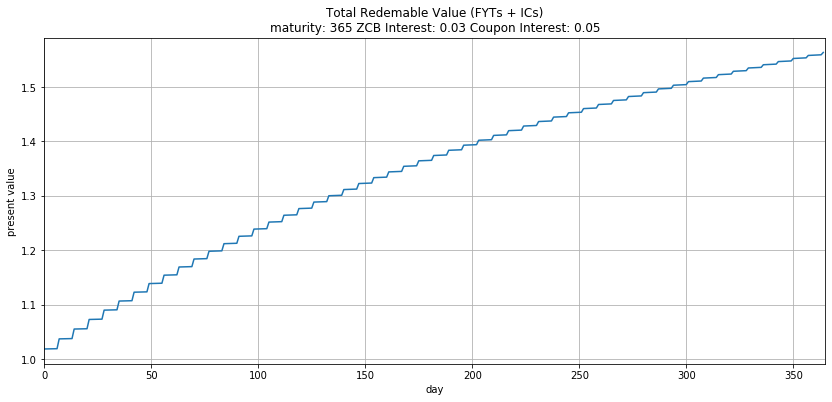

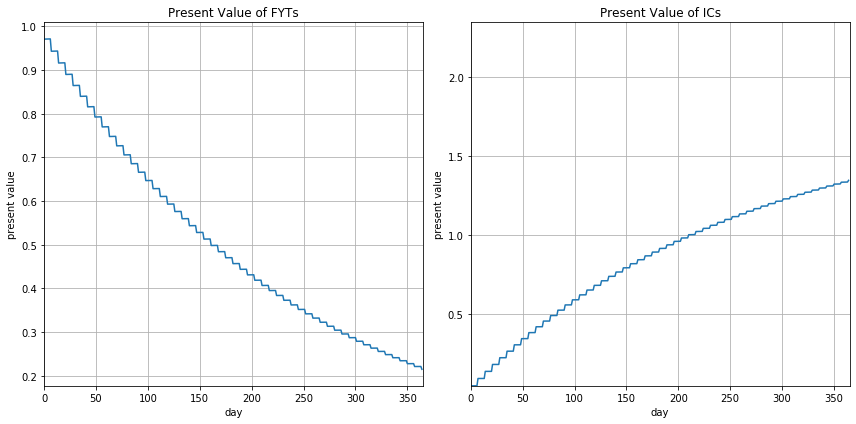

In [330]:
import matplotlib.pyplot as plt
import numpy  as np

other_title_text = "maturity: {} ZCB Interest: {} Coupon Interest: {}".format(initial_num_days_to_maturity,iZcb,iC)

x=np.array(days)

y=np.array(total_values)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
ax.plot(x,y)
ax.set_xlim([x[0],x[len(x)-1]+1])
#y=np.array([calc_zcb_present_value(day,initial_funds)+calc_ic_present_value(day,initial_funds) for day in days])
#ax.plot(x,y)
ax.grid()
ax.set_title('Total Redemable Value (FYTs + ICs)\n'+other_title_text)
ax.set_xlabel('day')
ax.set_ylabel('present value');


y=np.array(zcbs_values)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(x,y)
ax[0].set_xlim([x[0],x[len(x)-1]+1])
ax[0].grid()
ax[0].set_title('Present Value of FYTs')
ax[0].set_xlabel('day')
ax[0].set_ylabel('present value')

y=np.array(ics_values)
ax[1].plot(x,y)
ax[1].set_xlim([x[0],x[len(x)-1]+1])
ax[1].set_ylim([y[0],y[len(y)-1]+1])
ax[1].grid()
ax[1].set_title('Present Value of ICs')
ax[1].set_xlabel('day')
ax[1].set_ylabel('present value')

fig.tight_layout()


In [328]:
y=np.array([calc_zcb_present_value(day,initial_funds)+calc_ic_present_value(day,initial_funds) for day in days])
